### Question 1 - Test the below code

In [11]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
print(tf.__version__)

import matplotlib.pyplot as plt

tf.compat.v1.disable_eager_execution()

# Build a dataflow graph.
x = tf.Variable(3, name="x") 
y = tf.Variable(4, name="y") 
f=x*x*y+y+2

# Construct a `Session` to execute the graph.
sess = tf.compat.v1.Session()

# Execute the graph and store the value that `e` represents in `result`.
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

2.7.0
42


The answer to life and the universe !

## Question 2 - Linear Regression with Tensorflow 

In [16]:
import numpy as np
#Linear Regression with TensorFlow
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)
with tf.compat.v1.Session() as sess:
 theta_value = theta.eval()

In [18]:
print(theta_value)

[[-3.67372932e+01]
 [ 4.37366009e-01]
 [ 9.47520509e-03]
 [-1.08159676e-01]
 [ 6.48537397e-01]
 [-3.84734449e-06]
 [-3.79239232e-03]
 [-4.19136107e-01]
 [-4.32144403e-01]]


In [22]:
print(X)
print(y)

Tensor("X_8:0", shape=(20640, 9), dtype=float32)
Tensor("y_8:0", shape=(20640, 1), dtype=float32)


In [24]:
print(theta)

Tensor("MatMul_8:0", shape=(9, 1), dtype=float32)


##Test Tensor flow with MNIST (handwriting) data set




11501568/11490434 [==============================] - 0s 0us/step


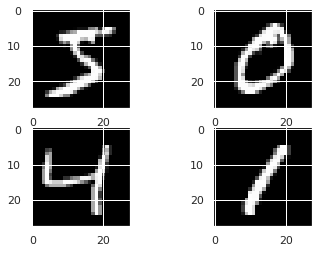

In [27]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


  # build the model
  model = baseline_model()
  # Fit the model
  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("Baseline Error: %.2f%%" % (100-scores[1]*100))

##Derive the gradients for below expressions:

Done in notes